In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
sns.set(style="darkgrid")

import time
import os
import psutil
import pickle

## Prepare Data

In [2]:
# Read data file
data_file = './adult.csv'
data_df = pd.read_csv(data_file)

In [3]:
data_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Check shape
data_df.shape

(32561, 15)

In [5]:
data_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
# Check info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
# Check missing values
data_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
# Replace all ? with nan, then check missing again.
data_df.replace('?', np.nan, inplace=True)

In [10]:
# Missing values show up, I decided to replace with mode.
data_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
# Replace with mode 
missing_cat = ['workclass', 'occupation', 'native.country']

data_df[missing_cat] = data_df[missing_cat].fillna(value= data_df[missing_cat].mode().iloc[0])

In [12]:
# Encoding our label to binary class
data_df['income'] = data_df['income'].map({'<=50K': 0, '>50K': 1})

In [13]:
data_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [14]:
data_df['income'].unique()

array([0, 1], dtype=int64)

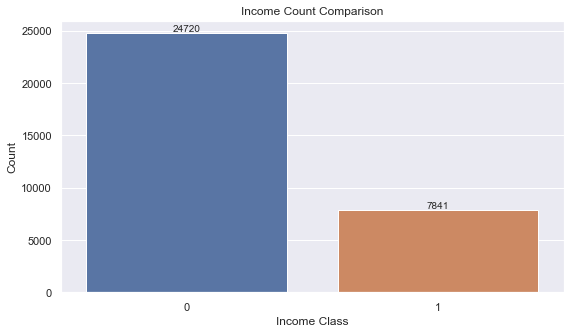

In [15]:
# Plot label
plt.figure(figsize=(9, 5))
plt.title('Income Count Comparison')
ax1 = sns.countplot(data=data_df, x='income', label='Count')
for container in ax1.containers:
    ax1.bar_label(container)

plt.xlabel('Income Class')
plt.ylabel('Count')
plt.show()

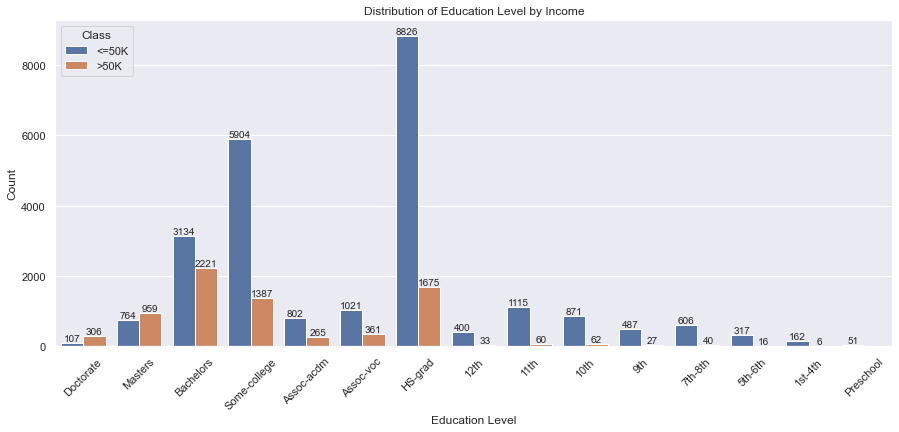

In [16]:
education_order = [
    'Doctorate', 'Masters', 'Bachelors', 'Some-college', 'Assoc-acdm', 'Assoc-voc',
    'HS-grad', '12th', '11th', '10th', '9th', '7th-8th', '5th-6th', '1st-4th', 'Preschool']

plt.figure(figsize=(15, 6))
ax2 = sns.countplot(data=data_df, x='education', hue='income', order=education_order)
for container in ax2.containers:
    ax2.bar_label(container)

plt.title('Distribution of Education Level by Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Class", labels=["<=50K", ">50K"])
plt.show()

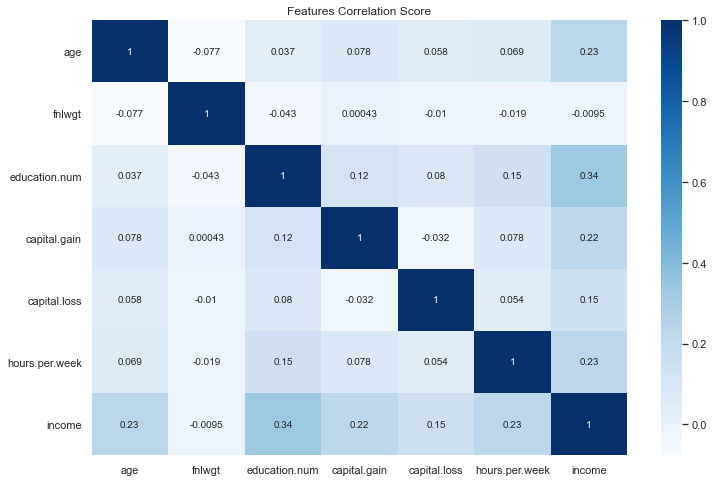

In [17]:
plt.figure(figsize=(12, 8))
plt.title('Features Correlation Score')
sns.heatmap(data= data_df.corr(), cmap='Blues', annot=True)
plt.show()

## Modeling Part

In [18]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score ,accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [19]:
# Encode category data
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
categorical_data = data_df[categorical_columns]

encoder = OrdinalEncoder()
encoded_categorical_data = encoder.fit_transform(categorical_data)

# Replace the original categorical columns with the encoded values
data_df[categorical_columns] = encoded_categorical_data

In [20]:
data_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3.0,77053,11.0,9,6.0,9.0,1.0,4.0,0.0,0,4356,40,38.0,0
1,82,3.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0,0
2,66,3.0,186061,15.0,10,6.0,9.0,4.0,2.0,0.0,0,4356,40,38.0,0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3.0,310152,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,38.0,0
32557,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0
32558,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1
32559,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0


In [21]:
# Export clean data
data_df.to_csv('CleanAdult.csv', index=False, encoding='utf-8')

In [22]:
X = data_df.drop(columns= ['income', 'fnlwgt', 'education'])
Y = data_df['income']

# Split train test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=13)

# Sclaer data
scaler = StandardScaler()

# Fit and transform the training and testing data using the scaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [23]:
class_names = ['<=50k', '>50k']

In [24]:
# Define list for check usage
training_time = []
memory_train = []
testing_time = []
memory_test = []

### Random Forest

In [25]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Training model
rf_base = RandomForestClassifier(n_estimators=300)
rf_model = rf_base.fit(x_train_scaled, y_train)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = (et_train - st_train)
mem_train = (et_memTrain - st_memTrain)



In [26]:
mem_train, et_memTrain, st_memTrain

(170.734375, 368.2421875, 197.5078125)

In [27]:
# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [28]:
# Set time
st_test = time.time()
st_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Predict model
y_pred1 = rf_model.predict(x_test_scaled)

et_test = time.time()
et_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = (et_test - st_test)
mem_test = (et_memTest - st_memTest)

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_train)

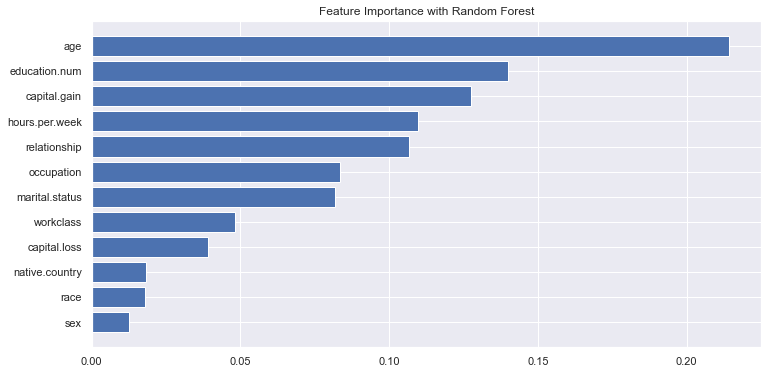

In [29]:
sorted_index = rf_model.feature_importances_.argsort()

plt.figure(figsize=(12, 6))
plt.barh(X.columns[sorted_index], rf_model.feature_importances_[sorted_index])
plt.title("Feature Importance with Random Forest")
plt.show()

In [30]:
acc = accuracy_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1, average='weighted')
precision = precision_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')

In [31]:
print(f'RF Model Baseline Accuracy: {acc*100:.4f}')
print(f'RF Model Baseline Recall: {recall*100:.4f}')
print(f'RF Model Baseline Precision: {precision*100:.4f}')
print(f'RF Model Baseline F1-Score: {f1*100:.4f}')

RF Model Baseline Accuracy: 85.2493
RF Model Baseline Recall: 85.2493
RF Model Baseline Precision: 84.7267
RF Model Baseline F1-Score: 84.8882


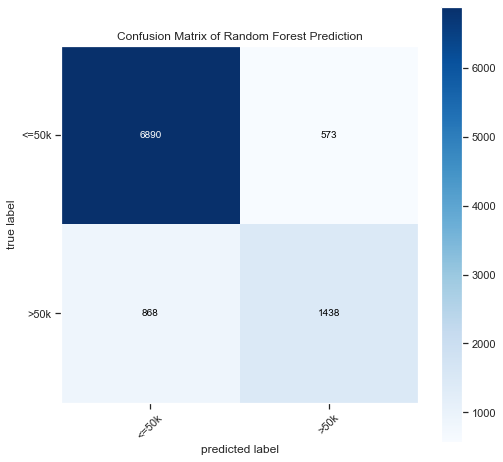

In [32]:
# Plot cm matrix
mat = confusion_matrix(y_test, y_pred1)
fig3 , ax3 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of Random Forest Prediction')
plt.show()

In [33]:
TN = mat[0][0]
FN = mat[1][0]
TP = mat[1][1]
FP = mat[0][1]
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')

TP: 1438, FP: 573, TN: 6890, FN: 868


## LightGBM Model

In [34]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Training model
lightGBM_base = LGBMClassifier(n_estimators=300, verbose=-1)
lgbm_model = lightGBM_base.fit(x_train_scaled, y_train)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain

# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [35]:
# Set time
st_test = time.time()
st_memTest = psutil.Process().memory_info().rss / (1024 * 1024)

# Predict model
y_pred2 = lgbm_model.predict(x_test_scaled)

et_test = time.time()
et_memTest = psutil.Process().memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

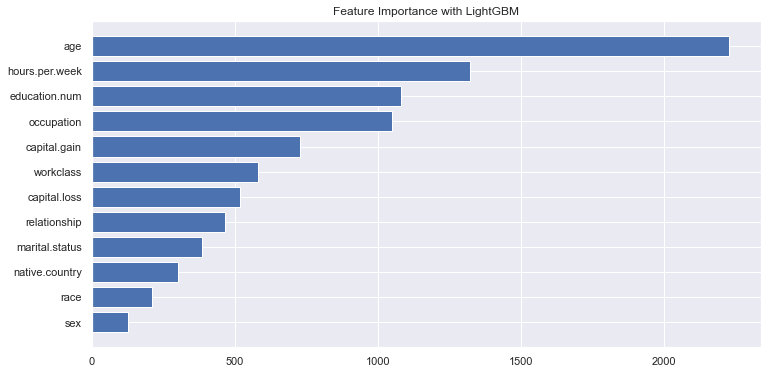

In [36]:
sorted_index = lgbm_model.feature_importances_.argsort()

plt.figure(figsize=(12, 6))
plt.barh(X.columns[sorted_index], lgbm_model.feature_importances_[sorted_index])
plt.title("Feature Importance with LightGBM")
plt.show()

In [37]:
acc = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2, average='weighted')
precision = precision_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')

In [38]:
print(f'LGBT Model Baseline Accuracy: {acc*100:.4f}')
print(f'LGBT Model Baseline Recall: {recall*100:.4f}')
print(f'LGBT Model Baseline Precision: {precision*100:.4f}')
print(f'LGBT Model Baseline F1-Score: {f1*100:.4f}')

LGBT Model Baseline Accuracy: 87.4910
LGBT Model Baseline Recall: 87.4910
LGBT Model Baseline Precision: 87.0745
LGBT Model Baseline F1-Score: 87.1607


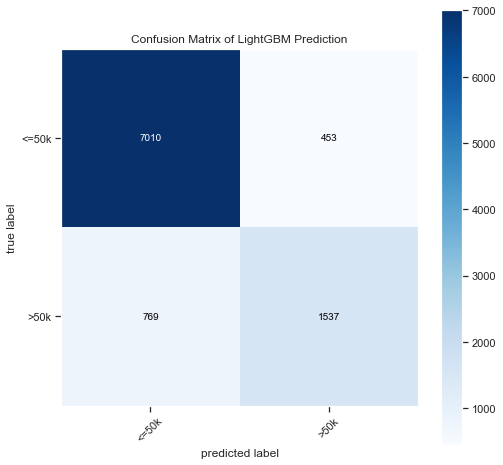

In [39]:
# Plot cm matrix
mat = confusion_matrix(y_test, y_pred2)
fig3 , ax3 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of LightGBM Prediction')
plt.show()

In [40]:
TN = mat[0][0]
FN = mat[1][0]
TP = mat[1][1]
FP = mat[0][1]
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')

TP: 1537, FP: 453, TN: 7010, FN: 769


### SVM Model

In [41]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Training model
svm_base = SVC()
svm_model = svm_base.fit(x_train_scaled, y_train)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain



In [42]:
# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [43]:
# Set time
st_test = time.time()
st_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Predict model
y_pred3 = svm_model.predict(x_test_scaled)

et_test = time.time()
et_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

In [44]:
acc = accuracy_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3, average='weighted')
precision = precision_score(y_test, y_pred3, average='weighted')
f1 = f1_score(y_test, y_pred3, average='weighted')

In [45]:
print(f'SVM Model Baseline Accuracy: {acc*100:.4f}')
print(f'SVM Model Baseline Recall: {recall*100:.4f}')
print(f'SVM Model Baseline Precision: {precision*100:.4f}')
print(f'SVM Model Baseline F1-Score: {f1*100:.4f}')

SVM Model Baseline Accuracy: 84.6760
SVM Model Baseline Recall: 84.6760
SVM Model Baseline Precision: 83.8554
SVM Model Baseline F1-Score: 83.7191


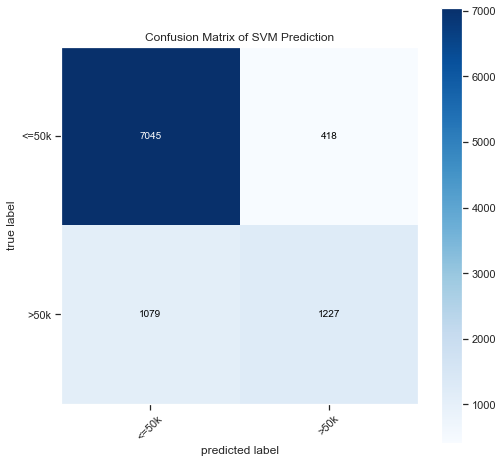

In [46]:
# Plot cm matrix
mat = confusion_matrix(y_test, y_pred3)
fig4 , ax4 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of SVM Prediction')
plt.show()

In [47]:
TN = mat[0][0]
FN = mat[1][0]
TP = mat[1][1]
FP = mat[0][1]
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')

TP: 1227, FP: 418, TN: 7045, FN: 1079


### MLP Model

In [48]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Build MLP model
mlp_base = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=400)
mlp_model = mlp_base.fit(x_train_scaled, y_train)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain



In [49]:
mem_train

1.33984375

In [50]:
# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [51]:
# Set time
st_test = time.time()
st_memTest = psutil.Process().memory_info().rss / (1024 * 1024)

# Predict model
y_pred4 = mlp_model.predict(x_test_scaled)

et_test = time.time()
et_memTest = psutil.Process().memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

In [52]:
acc = accuracy_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4, average='weighted')
precision = precision_score(y_test, y_pred4, average='weighted')
f1 = f1_score(y_test, y_pred4, average='weighted')

In [53]:
print(f'MLP Model Baseline Accuracy: {acc*100:.4f}')
print(f'MLP Model Baseline Recall: {recall*100:.4f}')
print(f'MLP Model Baseline Precision: {precision*100:.4f}')
print(f'MLP Model Baseline F1-Score: {f1*100:.4f}')

MLP Model Baseline Accuracy: 84.4406
MLP Model Baseline Recall: 84.4406
MLP Model Baseline Precision: 83.6049
MLP Model Baseline F1-Score: 83.6365


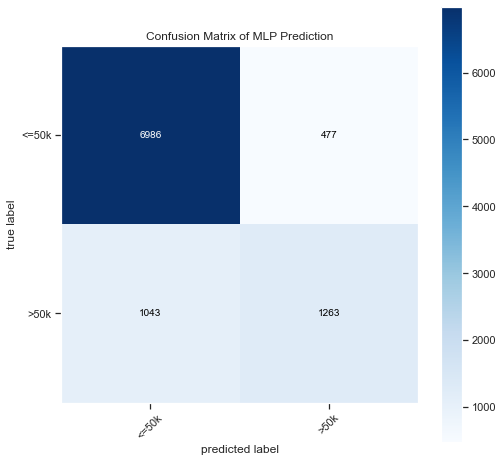

In [54]:
# Plot cm matrix
mat = confusion_matrix(y_test, y_pred4)
fig5 , ax5 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of MLP Prediction')
plt.show()

In [55]:
TN = mat[0][0]
FN = mat[1][0]
TP = mat[1][1]
FP = mat[0][1]
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')

TP: 1263, FP: 477, TN: 6986, FN: 1043


### LR Model

In [56]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Build model
lr_base = LogisticRegression()
lr_model = lr_base.fit(x_train_scaled, y_train)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain

# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [57]:
# Set time
st_test = time.time()
st_memTest = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

# Predict model
y_pred5 = lr_model.predict(x_test_scaled)

et_test = time.time()
et_memTest = psutil.Process().memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

In [58]:
acc = accuracy_score(y_test, y_pred5)
recall = recall_score(y_test, y_pred5, average='weighted')
precision = precision_score(y_test, y_pred5, average='weighted')
f1 = f1_score(y_test, y_pred5, average='weighted')

In [59]:
print(f'LR Model Baseline Accuracy: {acc*100:.4f}')
print(f'LR Model Baseline Recall: {recall*100:.4f}')
print(f'LR Model Baseline Precision: {precision*100:.4f}')
print(f'LR Model Baseline F1-Score: {f1*100:.4f}')

LR Model Baseline Accuracy: 82.3012
LR Model Baseline Recall: 82.3012
LR Model Baseline Precision: 81.0242
LR Model Baseline F1-Score: 80.7996


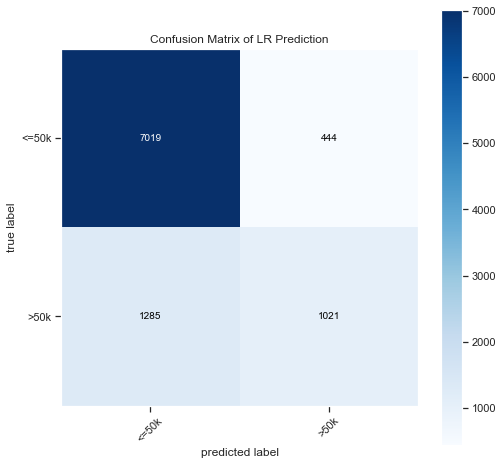

In [60]:
# Plot cm matrix
mat = confusion_matrix(y_test, y_pred5)
fig6 , ax6 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of LR Prediction')
plt.show()

In [61]:
TN = mat[0][0]
FN = mat[1][0]
TP = mat[1][1]
FP = mat[0][1]
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')

TP: 1021, FP: 444, TN: 7019, FN: 1285


### K-NN Model

In [62]:
# Set time
st_train = time.time()
st_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)

knn_base = KNeighborsClassifier(n_neighbors = 7)
knn_model = knn_base.fit(x_train_scaled, y_train)

et_train = time.time()
et_memTrain = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
# Calculate
runtime_train = et_train - st_train
mem_train = et_memTrain - st_memTrain

# Append to list
training_time.append(runtime_train)
memory_train.append(mem_train)

In [63]:
# Set time
st_test = time.time()
st_memTest = psutil.Process().memory_info().rss / (1024 * 1024)

# Predict model
y_pred6 = knn_model.predict(x_test_scaled)

et_test = time.time()
et_memTest = psutil.Process().memory_info().rss / (1024 * 1024)
# Calculate
runtime_test = et_test - st_test
mem_test = et_memTest - st_memTest

# Append to list
testing_time.append(runtime_test)
memory_test.append(mem_test)

In [64]:
acc = accuracy_score(y_test, y_pred6)
recall = recall_score(y_test, y_pred6, average='weighted')
precision = precision_score(y_test, y_pred6, average='weighted')
f1 = f1_score(y_test, y_pred6, average='weighted')

In [65]:
print(f'K-NN Model Baseline Accuracy: {acc*100:.4f}')
print(f'K-NN Model Baseline Recall: {recall*100:.4f}')
print(f'K-NN Model Baseline Precision: {precision*100:.4f}')
print(f'K-NN Model Baseline F1-Score: {f1*100:.4f}')

K-NN Model Baseline Accuracy: 83.1201
K-NN Model Baseline Recall: 83.1201
K-NN Model Baseline Precision: 82.6049
K-NN Model Baseline F1-Score: 82.8066


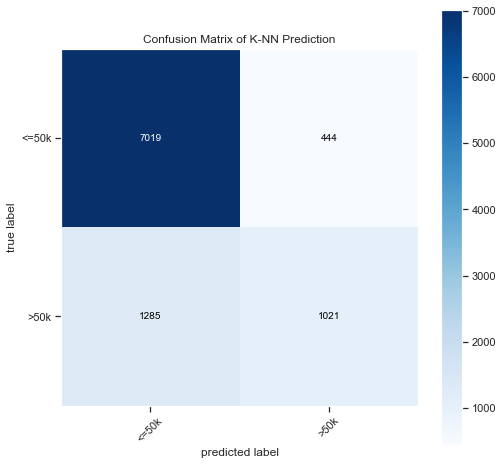

In [66]:
# Plot cm matrix
mat = confusion_matrix(y_test, y_pred5)
fig7 , ax7 = plot_confusion_matrix(conf_mat= mat, figsize=(8, 8),
                      cmap= plt.cm.Blues,
                      class_names= class_names,
                      colorbar= True)
disp = plt.title('Confusion Matrix of K-NN Prediction')
plt.show()

In [67]:
TN = mat[0][0]
FN = mat[1][0]
TP = mat[1][1]
FP = mat[0][1]
print(f'TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}')

TP: 1021, FP: 444, TN: 7019, FN: 1285


In [68]:
for train_time, train_memory in zip(training_time, memory_train):
    print(f'Training Time: {train_time:.2f} seconds')
    print(f'Training Memory: {train_memory:.2f} MB')

Training Time: 7.50 seconds
Training Memory: 170.73 MB
Training Time: 0.59 seconds
Training Memory: 1.98 MB
Training Time: 16.85 seconds
Training Memory: -15.98 MB
Training Time: 40.95 seconds
Training Memory: 1.34 MB
Training Time: 0.05 seconds
Training Memory: 2.51 MB
Training Time: 0.11 seconds
Training Memory: 2.31 MB


In [69]:
for test_time, test_memory in zip(testing_time, memory_test):
    print(f'Testing Time: {test_time:.2f} seconds')
    print(f'Testing Memory: {test_memory:.2f} MB')

Testing Time: 0.84 seconds
Testing Memory: 170.73 MB
Testing Time: 0.08 seconds
Testing Memory: -0.43 MB
Testing Time: 12.21 seconds
Testing Memory: 0.30 MB
Testing Time: 0.01 seconds
Testing Memory: 0.00 MB
Testing Time: 0.00 seconds
Testing Memory: 0.00 MB
Testing Time: 4.20 seconds
Testing Memory: 0.48 MB


In [70]:
import joblib
# Dump modelto pkl file
joblib.dump(rf_model, 'baseline_rf.pkl')
joblib.dump(lgbm_model, 'baseline_lgbm.pkl')
joblib.dump(svm_model, 'baseline_svm.pkl')
joblib.dump(mlp_model, 'baseline_mlp.pkl')
joblib.dump(lr_model, 'baseline_lr.pkl')
joblib.dump(knn_model, 'baseline_knn.pkl')

['baseline_knn.pkl']